In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/music-generation
! git clone https://github.com/facebookresearch/audiocraft.git
%cd audiocraft
%pip install -r requirements.txt

/content/drive/MyDrive/music-generation
fatal: destination path 'audiocraft' already exists and is not an empty directory.
/content/drive/MyDrive/music-generation/audiocraft
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 11.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 91.1 MB/s 

In [ ]:
%pip install 'torch>=2.0'
%pip install -U audiocraft

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.1/259.1 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for audiocraft: filename=audiocraft-0.0.1-py3-none-any.whl size=110215 sha256=309086fb56afd8b88648be15a8dba551656650929219b3d04f9e99eb25068081
  Stored in directory: /root/.cache/pip/wheels/3b/a8/1b/9a0c3ac602f6735e52be7af2932f4a0c939f8fead46f477c4a
Successfully built audiocraft


In [ ]:
! apt install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.


In [ ]:
import torchaudio
from audiocraft.models import MusicGen
from audiocraft.data.audio import audio_write
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

In [ ]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

Some weights of the model checkpoint at nlpconnect/vit-gpt2-image-captioning were not used when initializing VisionEncoderDecoderModel: ['decoder.transformer.h.0.crossattention.bias', 'decoder.transformer.h.2.attn.bias', 'decoder.transformer.h.8.attn.masked_bias', 'decoder.transformer.h.8.attn.bias', 'decoder.transformer.h.10.attn.masked_bias', 'decoder.transformer.h.3.crossattention.masked_bias', 'decoder.transformer.h.4.attn.bias', 'decoder.transformer.h.1.attn.bias', 'decoder.transformer.h.8.crossattention.masked_bias', 'decoder.transformer.h.5.crossattention.masked_bias', 'decoder.transformer.h.0.attn.masked_bias', 'decoder.transformer.h.2.crossattention.masked_bias', 'decoder.transformer.h.6.crossattention.masked_bias', 'decoder.transformer.h.6.crossattention.bias', 'decoder.transformer.h.1.attn.masked_bias', 'decoder.transformer.h.3.crossattention.bias', 'decoder.transformer.h.0.attn.bias', 'decoder.transformer.h.9.crossattention.masked_bias', 'decoder.transformer.h.6.attn.masked

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_featur

In [ ]:
path_to_image = '/content/drive/MyDrive/music-generation/images/happy.jpeg'
path_to_sample_music = '/content/drive/MyDrive/music-generation/music/happy_music.mp3'
custom_description = 'happy guitar'

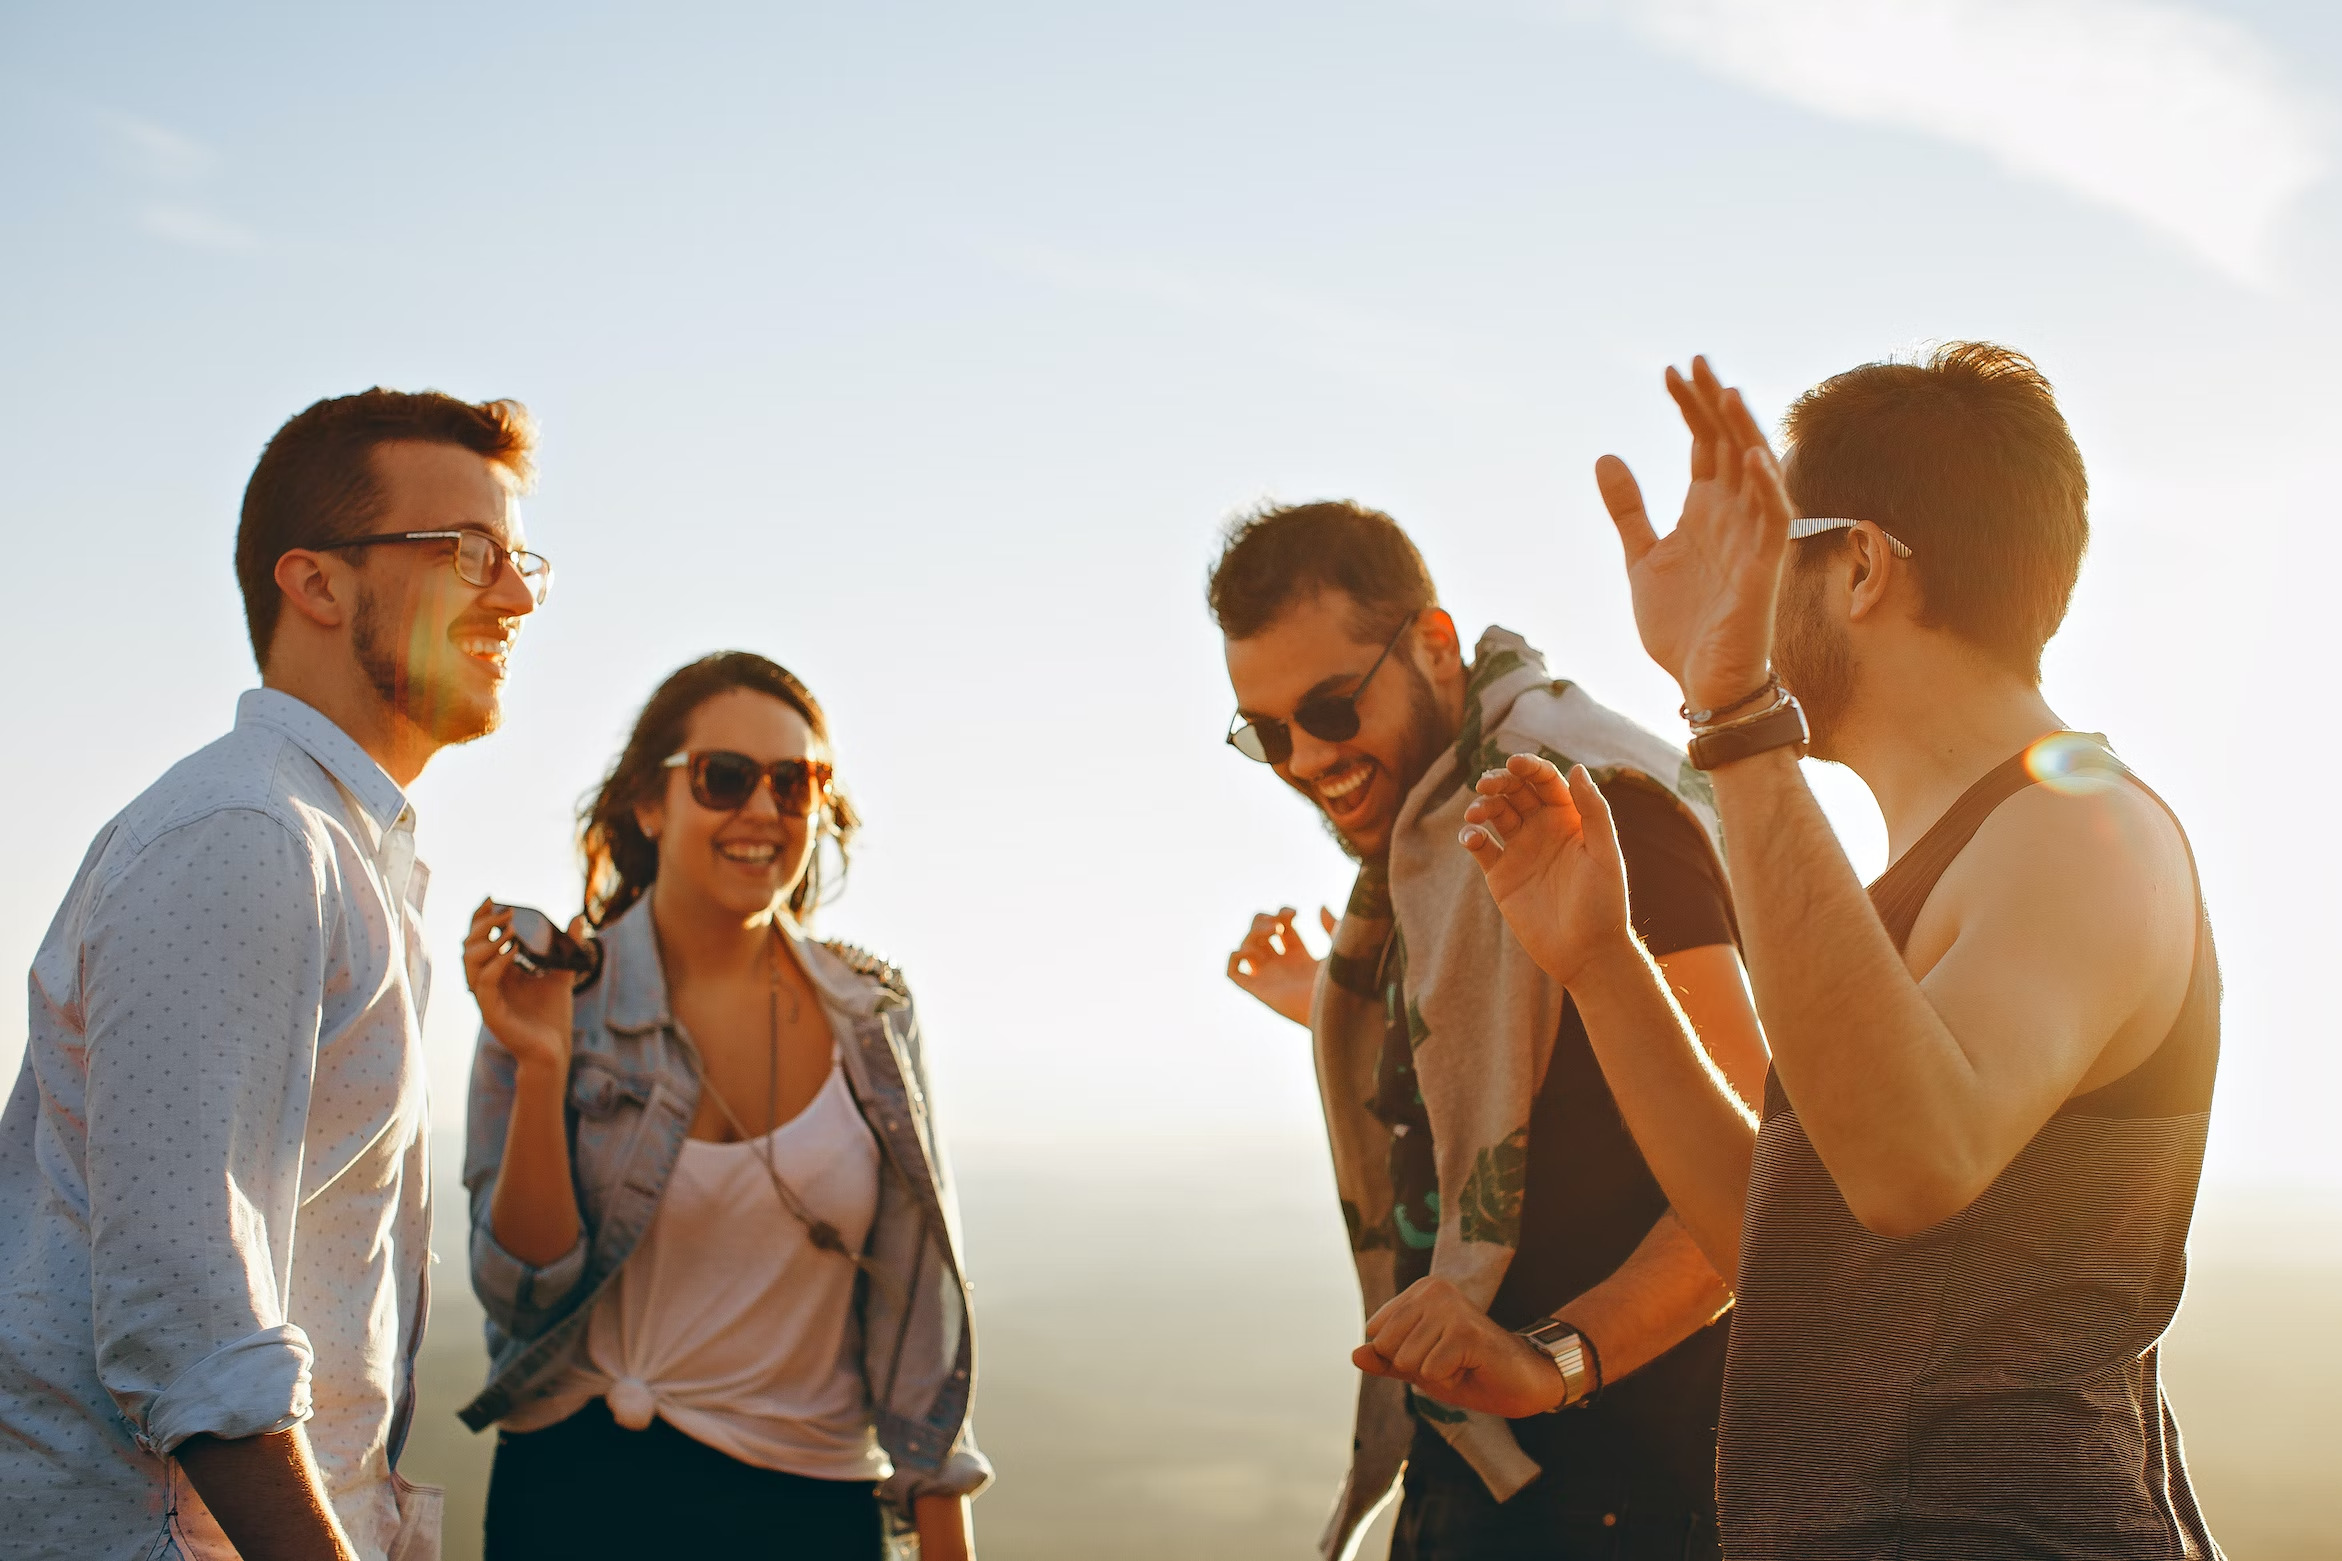

In [ ]:
from IPython.display import Image, display
display(Image(filename=path_to_image))

In [ ]:
import PIL
max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}
def predict_step(image_paths):
  images = []
  for image_path in image_paths:
    i_image = PIL.Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
  pixel_values = pixel_values.to(device)

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds

caption_generated = predict_step([path_to_image])
print(caption_generated)

['people standing next to each other']


In [ ]:
path_to_save_sampled = ''
path_to_save_unsampled = ''
model = MusicGen.get_pretrained('melody')
model.set_generation_params(duration=8)
wav = model.generate(caption_generated)
for idx, one_wav in enumerate(wav):
    audio_write(f'no_sample_h_h_{idx}', one_wav.cpu(), model.sample_rate, strategy="loudness", loudness_compressor=True)
melody, sr = torchaudio.load(path_to_sample_music)
wav = model.generate_with_chroma(caption_generated, melody[None].expand(len(caption_generated), -1, -1), sr)
for idx, one_wav in enumerate(wav):
    audio_write(f'sample_h_h{idx}', one_wav.cpu(), model.sample_rate, strategy="loudness", loudness_compressor=True)

CLIPPING no_sample_h_h_0 happening with proba (a bit of clipping is okay): 0.007863281294703484 maximum scale:  1.8008553981781006
CLIPPING sample_h_h0 happening with proba (a bit of clipping is okay): 0.011285156011581421 maximum scale:  2.08594012260437


In [ ]:
import IPython
IPython.display.display(IPython.display.Audio('/content/drive/MyDrive/music-generation/audiocraft/no_sample_h_h_0.wav'))
IPython.display.display(IPython.display.Audio('/content/drive/MyDrive/music-generation/audiocraft/no_sample_h_h_0.wav'))
IPython.display.display(IPython.display.Audio(path_to_sample_music))


Output hidden; open in https://colab.research.google.com to view.